# Sistemas de Recomendação

$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bU}{\mathbf{U}}$
$\newcommand{\bu}{\mathbf{u}}$
$\newcommand{\bV}{\mathbf{V}}$
$\newcommand{\bv}{\mathbf{v}}$
$\newcommand{\bG}{\mathbf{G}}$
$\newcommand{\bg}{\mathbf{g}}$
$\newcommand{\bZ}{\mathbf{Z}}$
$\newcommand{\bz}{\mathbf{z}}$
$\newcommand{\bmu}{\boldsymbol{\mu}}$
$\newcommand{\bC}{\mathbf{C}}$
$\newcommand{\bS}{\mathbf{S}}$
$\newcommand{\bT}{\mathbf{T}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\calS}{\mathcal{S}}$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
root_mean_squared_error = lambda a, b: ((a-b)**2).mean()**0.5

import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Lambda, Embedding, Flatten, Dot
from tensorflow.keras.layers import Add, Activation, Dense
from tensorflow.keras.optimizers import Adam

# Exemplo introdutório

In [2]:
# Example from course slides

users = {0: 'Alice',
         1: 'Bruno',
         2: 'Carol',
         3: 'Davi'}

items = {0: 'Star Wars',
         1: 'Matrix',
         2: 'X-Men',
         3: 'Titanic',
         4: 'Casablanca'}

n_users = len(users)
n_items = len(items)

# [user, item, rating]
data = np.array([[0, 0, 0],
                 [0, 1, 0],
                 [0, 3, 4],
                 [1, 0, 5],
                 [1, 1, 5],
                 [1, 3, 0],
                 [1, 4, 0],
                 [2, 0, 5],
                 [2, 2, 4],
                 [2, 3, 0],
                 [2, 4, 0],
                 [3, 0, 0],
                 [3, 2, 0],
                 [3, 3, 5],
                 [3, 4, 5]])

x = data[:, [0, 1]]
y = data[:, 2]

In [3]:
def get_model(n_factors=2):
    tf.random.set_seed(0)
    x = Input(shape=(2,), name='input_user_item')
    #input1 = x[:, 0]  # simpler form (but without name)
    #input2 = x[:, 1]  # simpler form (but without name)
    input1 = Lambda(lambda x: x[:, 0], name='input_user')(x)
    input2 = Lambda(lambda x: x[:, 1], name='input_item')(x)
    
    latent1 = Embedding(n_users, n_factors, name='latent_user')(input1)
    latent2 = Embedding(n_items, n_factors, name='latent_item')(input2)
    y = Dot(axes=1)([latent1, latent2])
    
    model = Model(inputs=x, outputs=y)
    return model

get_model().summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_user_item (InputLayer)    [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_user (Lambda)             (None,)              0           input_user_item[0][0]            
__________________________________________________________________________________________________
input_item (Lambda)             (None,)              0           input_user_item[0][0]            
__________________________________________________________________________________________________
latent_user (Embedding)         (None, 2)            8           input_user[0][0]                 
_______________________________________________________________________________________

In [4]:
model = get_model()
model.compile(loss='mse', optimizer=Adam(lr=0.1))
history = model.fit(x, y, epochs=80)

Epoch 1/80
1/1 [==============================] - 0s 0s/step - loss: 10.4663
Epoch 2/80
1/1 [==============================] - 0s 998us/step - loss: 10.4392
Epoch 3/80
1/1 [==============================] - 0s 997us/step - loss: 10.2873
Epoch 4/80
1/1 [==============================] - 0s 997us/step - loss: 10.0890
Epoch 5/80
1/1 [==============================] - 0s 2ms/step - loss: 9.8163
Epoch 6/80
1/1 [==============================] - 0s 998us/step - loss: 9.4427
Epoch 7/80
1/1 [==============================] - 0s 997us/step - loss: 8.9685
Epoch 8/80
1/1 [==============================] - 0s 998us/step - loss: 8.3906
Epoch 9/80
1/1 [==============================] - 0s 997us/step - loss: 7.7090
Epoch 10/80
1/1 [==============================] - 0s 997us/step - loss: 6.9337
Epoch 11/80
1/1 [==============================] - 0s 3ms/step - loss: 6.0830
Epoch 12/80
1/1 [==============================] - 0s 998us/step - loss: 5.1828
Epoch 13/80
1/1 [==============================] - 0

In [5]:
y_pred = model.predict(x).reshape(-1)
print(f' MSE: {mean_squared_error(y, y_pred):.2f}')
print(f'RMSE: {root_mean_squared_error(y, y_pred):.2f}')
print(f' MAE: {mean_absolute_error(y, y_pred):.2f}')
print(f'Max error: {np.max(np.abs(y - y_pred)):.4f}')

 MSE: 0.00
RMSE: 0.04
 MAE: 0.03
Max error: 0.0731


In [6]:
for u in users:
    rated_items = data[data[:, 0] == u][:, 1]
    unrated_items = [i for i in items if i not in rated_items]
    for i in rated_items:
        r = data[(data[:, 0] == u) & (data[:, 1] == i)][0, 2]
        print(f"{users[u]:>5}'s rating for {items[i]:>10}: {r:.1f}")
    print('')
    for i in unrated_items:
        r = model.predict([[u, i]]).squeeze()
        print(f"{users[u]:>5}'s predicted rating for {items[i]:>10}: {round(2*r)/2:.1f}  ({r:>5.2f})")
    print('')

Alice's rating for  Star Wars: 0.0
Alice's rating for     Matrix: 0.0
Alice's rating for    Titanic: 4.0

Alice's predicted rating for      X-Men: 0.0  (-0.03)
Alice's predicted rating for Casablanca: 4.0  ( 3.98)

Bruno's rating for  Star Wars: 5.0
Bruno's rating for     Matrix: 5.0
Bruno's rating for    Titanic: 0.0
Bruno's rating for Casablanca: 0.0

Bruno's predicted rating for      X-Men: 4.0  ( 4.05)

Carol's rating for  Star Wars: 5.0
Carol's rating for      X-Men: 4.0
Carol's rating for    Titanic: 0.0
Carol's rating for Casablanca: 0.0

Carol's predicted rating for     Matrix: 5.0  ( 5.05)

 Davi's rating for  Star Wars: 0.0
 Davi's rating for      X-Men: 0.0
 Davi's rating for    Titanic: 5.0
 Davi's rating for Casablanca: 5.0

 Davi's predicted rating for     Matrix: 0.0  (-0.02)



In [7]:
# matrix of user embeddings
P = model.get_layer('latent_user').weights[0].numpy()
P

array([[-1.2014666,  1.3862915],
       [ 1.6772667,  1.4647301],
       [ 1.6802689,  1.4517628],
       [-1.5001832,  1.733903 ]], dtype=float32)

In [8]:
# matrix of item embeddings
Q = model.get_layer('latent_item').weights[0].numpy()
Q

array([[ 1.7241026,  1.4892203],
       [ 1.7251998,  1.4816427],
       [ 1.3844453,  1.1771915],
       [-1.4281687,  1.6364156],
       [-1.4308362,  1.6322744]], dtype=float32)

In [9]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=2, random_state=0)
cluster.fit(P)
for k in range(cluster.n_clusters):
    print(f'Cluster {k}:')
    for i in np.where(cluster.labels_ == k)[0]:
        print(users[i])
    print()

Cluster 0:
Alice
Davi

Cluster 1:
Bruno
Carol



In [10]:
cluster = KMeans(n_clusters=2)
cluster.fit(Q)
for k in range(cluster.n_clusters):
    print(f'Cluster {k}:')
    for i in np.where(cluster.labels_ == k)[0]:
        print(items[i])
    print()

Cluster 0:
Star Wars
Matrix
X-Men

Cluster 1:
Titanic
Casablanca



In [12]:
from sklearn.neighbors import NearestNeighbors

i = 3
K = 2
nbrs = NearestNeighbors(n_neighbors=K).fit(Q)
_, indices = nbrs.kneighbors(Q[[i]])
print(f'The {K} most similar to {items[i]} (including itself) are:')
for j in indices[0]:
    print(items[j])

The 2 most similar to Titanic (including itself) are:
Titanic
Casablanca


# MovieLens

- Vamos usar o conjunto de dados [MovieLens Latest Small](https://grouplens.org/datasets/movielens), o qual consiste de 100836 avaliações de 9742 filmes feitas por 610 usuários entre março de 1996 e setembro de 2018 (leia mais na [documentação](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html)).
- O conjunto será separado em 80% de treinamento, 10% de validação e 10% de teste.
- Para melhorar o desempenho do modelo, posteriormente iremos introduzir *biases* de usuários e de filmes, bem como um *bias* global. Outra técnica que experimentaremos é restringir os valores da saída através de uma função sigmóide, escalonada para a faixa de possíveis notas de avaliação.
- Finalmente, iremos explorar algumas aplicações do modelo obtido: encontrar filmes similares a um dado filme e fornecer as 10 melhores recomendações para algum usuário.


## Preparação dos dados

In [13]:
from zipfile import ZipFile
from tensorflow.keras.utils import get_file

url = 'http://files.grouplens.org/datasets/movielens/ml-latest-small.zip'
filename = url.split('/')[-1]
with ZipFile(get_file(filename, url)) as z:
    movies = pd.read_csv(z.open('ml-latest-small/movies.csv'), index_col=0)
    data = pd.read_csv(z.open('ml-latest-small/ratings.csv'), usecols=[0,1,2])

In [14]:
print(movies.shape)
movies.head()

(9742, 2)


,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [15]:
def search(query):
    return movies[movies.title.str.contains(query, case=False)]

In [16]:
# from title to movieId
search('matrix')

,title,genres
movieId,,
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
6365,"Matrix Reloaded, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX
6934,"Matrix Revolutions, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX
27660,"Animatrix, The (2003)",Action|Animation|Drama|Sci-Fi


In [17]:
# from movieId to title
movies.title[2571]

'Matrix, The (1999)'

In [18]:
# ratings
print(data.shape)
data.head()

(100836, 3)


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [19]:
data.describe().loc[['min', 'max']]

,userId,movieId,rating
min,1.0,1.0,0.5
max,610.0,193609.0,5.0


In [20]:
data.nunique()

userId      610
movieId    9724
rating       10
dtype: int64

In [21]:
sorted(data['rating'].unique())

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

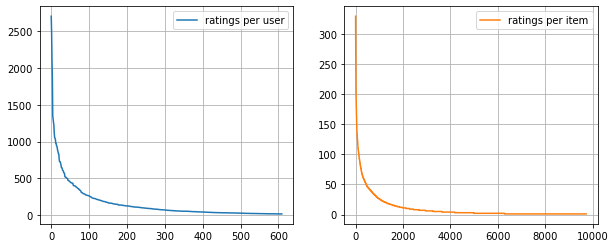

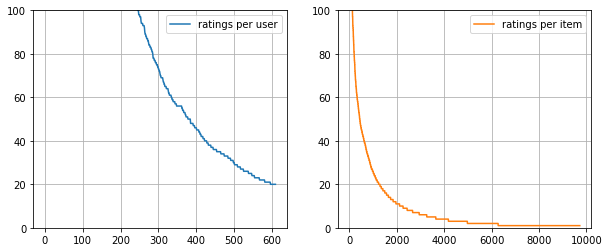

In [22]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(data['userId'].value_counts().values, label='ratings per user');
plt.legend();
plt.grid();
plt.subplot(1, 2, 2)
plt.plot(data['movieId'].value_counts().values, label='ratings per item', c='tab:orange');
plt.legend();
plt.grid();

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(data['userId'].value_counts().values, label='ratings per user');
plt.legend();
plt.grid();
plt.ylim([0, 100]);
plt.subplot(1, 2, 2)
plt.plot(data['movieId'].value_counts().values, label='ratings per item', c='tab:orange');
plt.legend();
plt.grid();
plt.ylim([0, 100]);

In [23]:
min_user_count = 20
min_item_count = 20

while len(data) > 0:
    user_counts = data['userId'].value_counts()
    item_counts = data['movieId'].value_counts()
    if np.all(user_counts >= min_user_count) and np.all(item_counts >= min_item_count):
        break    
    data = data[np.isin(data['userId'], user_counts[user_counts >= min_user_count].index)]
    data = data[np.isin(data['movieId'], item_counts[item_counts >= min_item_count].index)]

print(data.shape)
data.nunique()

(67020, 3)


userId      566
movieId    1286
rating       10
dtype: int64

In [24]:
movies = movies.loc[data['movieId'].unique()]
movies

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
6,Heat (1995),Action|Crime|Thriller
47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...
5881,Solaris (2002),Drama|Romance|Sci-Fi
3979,Little Nicky (2000),Comedy
4247,Joe Dirt (2001),Adventure|Comedy|Mystery|Romance


- Será necessário aplicar um codificador como o `sklearn.preprocessing.OrdinalEncoder(dtype=int)` para converter o conjunto de usuários e o conjunto de itens em inteiros consecutivos a partir de zero, pois isso é assumido pela camada de Embedding do Keras, mas não é necessariamente satisfeito no conjunto de dados.

In [25]:
#x = data[['userId', 'movieId']].to_numpy()
y = data['rating'].to_numpy()

data[['userId', 'movieId']].to_numpy()

array([[     1,      1],
       [     1,      3],
       [     1,      6],
       ...,
       [   610, 164179],
       [   610, 166528],
       [   610, 168252]], dtype=int64)

In [26]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(dtype=int)
x = encoder.fit_transform(data[['userId', 'movieId']].to_numpy())

x

array([[   0,    0],
       [   0,    2],
       [   0,    4],
       ...,
       [ 565, 1283],
       [ 565, 1284],
       [ 565, 1285]])

**Dica:** para evitar confusão, use notações diferentes para os dados de entrada originais e pré-processados (i.e., não denote-os ambos por `x`). Uma sugestão é reservar `x` para os dados completamente pré-processados, prontos para entrar no modelo de *deep learning*, e, caso necessário, uma outra notação para os dados de entrada originais. Por exemplo:
```python
data_in = data[cols_in]
x = prep.fit_transform(data_in.to_numpy())
```
ou simplesmente:
```python
x = prep.fit_transform(data[cols_in].to_numpy())
```
onde `prep` representa a pipeline de pré-processamento e `cols_in` a lista de colunas de entrada.

In [27]:
n_users, n_items = x.max(axis=0) + 1
n_users, n_items

(566, 1286)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=len(x_test), random_state=0)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(53616, 2) (53616,)
(6702, 2) (6702,)
(6702, 2) (6702,)


In [29]:
# Do all users and items in the validation and test sets appear also in the training set?

for D in [x_val, x_test]:
    for j in [0, 1]:
        print(np.all(np.isin(np.unique(D[:, j]), np.unique(x_train[:, j]))))

True
True
True
True


- Por que, nesse caso, podemos fazer a separação entre treino e teste *após* a codificação dos atributos?

## Desenvolvimento do modelo

In [30]:
def get_model(n_factors, global_bias=False, user_bias=False, item_bias=False, sigmoid=False):
    tf.random.set_seed(0)
    x = Input(shape=(2,), name='input_user_item')
    input1 = Lambda(lambda x: x[:, 0], name='input_user')(x)
    input2 = Lambda(lambda x: x[:, 1], name='input_item')(x)
    
    latent1 = Embedding(n_users, n_factors, name='latent_user')(input1)
    latent2 = Embedding(n_items, n_factors, name='latent_item')(input2)
    y = Dot(axes=1)([latent1, latent2])
    
    if user_bias:
        bias1 = Embedding(n_users, 1, name='bias_user')(input1)
        y = Add()([y, bias1])
    if item_bias:
        bias2 = Embedding(n_items, 1, name='bias_item')(input2)
        y = Add()([y, bias2])
    if global_bias:
        y = Dense(1, kernel_constraint=tf.keras.constraints.unit_norm(), name='bias_global')(y)
    if sigmoid:
        y = Activation('sigmoid')(y)
        y = Lambda(lambda x: 4.5*x + 0.5)(y)
    
    model = Model(inputs=x, outputs=y)
    return model

get_model(n_factors=50, global_bias=True, user_bias=True, item_bias=True, sigmoid=True).summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_user_item (InputLayer)    [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_user (Lambda)             (None,)              0           input_user_item[0][0]            
__________________________________________________________________________________________________
input_item (Lambda)             (None,)              0           input_user_item[0][0]            
__________________________________________________________________________________________________
latent_user (Embedding)         (None, 50)           28300       input_user[0][0]                 
_______________________________________________________________________________________

In [31]:
%%time
# baseline (no sigmoid, no biases)
model = get_model(n_factors=50)
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_val, y_val))
# obs: possible to get val_loss around 0.66 with smaller lr and more epochs

Epoch 1/5
838/838 [==============================] - 1s 1ms/step - loss: 11.6383 - val_loss: 4.3933
Epoch 2/5
838/838 [==============================] - 1s 1ms/step - loss: 1.8233 - val_loss: 0.9580
Epoch 3/5
838/838 [==============================] - 1s 1ms/step - loss: 0.7955 - val_loss: 0.7363
Epoch 4/5
838/838 [==============================] - 1s 1ms/step - loss: 0.6985 - val_loss: 0.7100
Epoch 5/5
838/838 [==============================] - 1s 1ms/step - loss: 0.6739 - val_loss: 0.7025
Wall time: 5.19 s


In [32]:
%%time
# sigmoid
model = get_model(n_factors=50, sigmoid=True)
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
838/838 [==============================] - 1s 1ms/step - loss: 1.5813 - val_loss: 1.0069
Epoch 2/5
838/838 [==============================] - 1s 1ms/step - loss: 0.7929 - val_loss: 0.7237
Epoch 3/5
838/838 [==============================] - 1s 1ms/step - loss: 0.6526 - val_loss: 0.6800
Epoch 4/5
838/838 [==============================] - 1s 1ms/step - loss: 0.5753 - val_loss: 0.6593
Epoch 5/5
838/838 [==============================] - 1s 1ms/step - loss: 0.5058 - val_loss: 0.6530
Wall time: 5.47 s


In [33]:
%%time
# global bias
model = get_model(n_factors=50, global_bias=True)
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
838/838 [==============================] - 1s 1ms/step - loss: 9.8898 - val_loss: 3.1016
Epoch 2/5
838/838 [==============================] - 1s 1ms/step - loss: 1.3691 - val_loss: 0.8395
Epoch 3/5
838/838 [==============================] - 1s 1ms/step - loss: 0.7492 - val_loss: 0.7214
Epoch 4/5
838/838 [==============================] - 1s 1ms/step - loss: 0.6890 - val_loss: 0.7028
Epoch 5/5
838/838 [==============================] - 1s 1ms/step - loss: 0.6614 - val_loss: 0.6912
Wall time: 5.35 s


In [34]:
%%time
# user bias
model = get_model(n_factors=50, user_bias=True)
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
838/838 [==============================] - 1s 1ms/step - loss: 10.8978 - val_loss: 3.9071
Epoch 2/5
838/838 [==============================] - 1s 1ms/step - loss: 1.6816 - val_loss: 0.9257
Epoch 3/5
838/838 [==============================] - 1s 1ms/step - loss: 0.7808 - val_loss: 0.7311
Epoch 4/5
838/838 [==============================] - 1s 1ms/step - loss: 0.6929 - val_loss: 0.7068
Epoch 5/5
838/838 [==============================] - 1s 2ms/step - loss: 0.6672 - val_loss: 0.6989
Wall time: 6.08 s


In [35]:
%%time
# item bias
model = get_model(n_factors=50, item_bias=True)
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
838/838 [==============================] - 1s 1ms/step - loss: 11.1608 - val_loss: 4.0342
Epoch 2/5
838/838 [==============================] - 1s 1ms/step - loss: 1.7086 - val_loss: 0.9279
Epoch 3/5
838/838 [==============================] - 1s 1ms/step - loss: 0.7831 - val_loss: 0.7321
Epoch 4/5
838/838 [==============================] - 1s 1ms/step - loss: 0.6957 - val_loss: 0.7090
Epoch 5/5
838/838 [==============================] - 1s 1ms/step - loss: 0.6710 - val_loss: 0.7009
Wall time: 6.35 s


In [36]:
%%time
# sigmoid, all biases
model = get_model(n_factors=50, sigmoid=True, global_bias=True, user_bias=True, item_bias=True)
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
838/838 [==============================] - 1s 1ms/step - loss: 1.1645 - val_loss: 0.8596
Epoch 2/5
838/838 [==============================] - 1s 1ms/step - loss: 0.7510 - val_loss: 0.7024
Epoch 3/5
838/838 [==============================] - 1s 1ms/step - loss: 0.6029 - val_loss: 0.6631
Epoch 4/5
838/838 [==============================] - 1s 1ms/step - loss: 0.4959 - val_loss: 0.6528
Epoch 5/5
838/838 [==============================] - 1s 1ms/step - loss: 0.4029 - val_loss: 0.6576
Wall time: 5.73 s


- Melhor modelo para esse conjunto de dados: `sigmoid`
- Porém, o modelo `sigmoid, all biases` conseguiu melhor o desempenho de treino
  - Possivelmente teria o melhor desempenho em um conjunto maior, com menos chance de overfitting
- Todos os modelos incorrem em overfitting rapidamente (< 10 épocas)

In [37]:
%%time
# sigmoid
model = get_model(n_factors=50, sigmoid=True)
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
838/838 [==============================] - 1s 1ms/step - loss: 1.5813 - val_loss: 1.0069
Epoch 2/5
838/838 [==============================] - 1s 995us/step - loss: 0.7929 - val_loss: 0.7237
Epoch 3/5
838/838 [==============================] - 1s 925us/step - loss: 0.6526 - val_loss: 0.6800
Epoch 4/5
838/838 [==============================] - 1s 952us/step - loss: 0.5753 - val_loss: 0.6593
Epoch 5/5
838/838 [==============================] - 1s 916us/step - loss: 0.5058 - val_loss: 0.6530
Wall time: 4.64 s


## Avaliação do modelo

In [38]:
model.evaluate(x_test, y_test)

210/210 [==============================] - 0s 446us/step - loss: 0.6499


0.6499115228652954

In [39]:
y_pred = model.predict(x_test).reshape(-1)
print(f' MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'RMSE: {root_mean_squared_error(y_test, y_pred):.2f}')
print(f' MAE: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'Max error: {np.max(np.abs(y_test - y_pred)):.4f}')

 MSE: 0.65
RMSE: 0.81
 MAE: 0.62
Max error: 3.8663


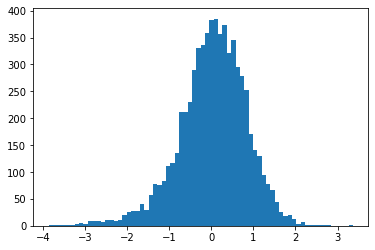

In [40]:
plt.hist((y_test - y_pred), bins='auto');

## Retreinando e fazendo predições

Treinando com todos os dados disponíveis:

In [41]:
%%time
# sigmoid
model = get_model(n_factors=50, sigmoid=True)
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
history = model.fit(x, y, batch_size=64, epochs=5)

Epoch 1/5
1048/1048 [==============================] - 1s 920us/step - loss: 1.4538
Epoch 2/5
1048/1048 [==============================] - 1s 891us/step - loss: 0.7290
Epoch 3/5
1048/1048 [==============================] - 1s 903us/step - loss: 0.6204
Epoch 4/5
1048/1048 [==============================] - 1s 903us/step - loss: 0.5471
Epoch 5/5
1048/1048 [==============================] - 1s 898us/step - loss: 0.4820
Wall time: 5.42 s


### Encontrando itens similares

In [42]:
# matrix of item embeddings
Q = model.get_layer('latent_item').weights[0].numpy()
Q

array([[-1.19972222e-01, -1.64161831e-01, -3.52909341e-02, ...,
         3.83125812e-01, -1.94298387e-01,  2.63131171e-01],
       [-5.50188497e-02, -1.88727349e-01,  1.34979993e-01, ...,
         9.77170393e-02, -1.54138014e-01,  1.70593068e-01],
       [-2.54243128e-02, -1.71568602e-01,  2.06975698e-01, ...,
         8.66355672e-02,  1.50688598e-03, -1.47994906e-02],
       ...,
       [-2.48787627e-01, -1.63845971e-01,  7.42901815e-03, ...,
         8.73534456e-02, -1.59911349e-01,  2.44332209e-01],
       [-1.41495332e-01, -1.72565430e-01, -2.63954848e-01, ...,
         1.23488292e-01, -2.26232514e-01,  2.99630702e-01],
       [-2.52087235e-01, -1.99439555e-01,  3.03340494e-04, ...,
         2.69661576e-01, -2.26904944e-01,  1.24716476e-01]], dtype=float32)

In [43]:
search('x-men')

,title,genres
movieId,,
3793,X-Men (2000),Action|Adventure|Sci-Fi
6333,X2: X-Men United (2003),Action|Adventure|Sci-Fi|Thriller
45499,X-Men: The Last Stand (2006),Action|Sci-Fi|Thriller
68319,X-Men Origins: Wolverine (2009),Action|Sci-Fi|Thriller
87232,X-Men: First Class (2011),Action|Adventure|Sci-Fi|Thriller|War
111362,X-Men: Days of Future Past (2014),Action|Adventure|Sci-Fi


In [44]:
i = 3793
K = 6
nbrs = NearestNeighbors(n_neighbors=K).fit(Q)
_, indices = nbrs.kneighbors(Q[[encoder.transform([[1, i]])[0, 1]]])
print(f'The {K} most similar to {movies.title[i]} (including itself) are:')
for j in indices[0]:
    print(movies.title[encoder.inverse_transform([[1, j]])[0, 1]])

The 6 most similar to X-Men (2000) (including itself) are:
X-Men (2000)
X2: X-Men United (2003)
Spider-Man (2002)
Pirates of the Caribbean: The Curse of the Black Pearl (2003)
Thor: The Dark World (2013)
Stardust (2007)


### Fazendo recomendações

In [45]:
data['title'] = movies.title[data['movieId'].values].values
data.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,1,3,4.0,Grumpier Old Men (1995)
2,1,6,4.0,Heat (1995)
3,1,47,5.0,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,"Usual Suspects, The (1995)"


In [46]:
u = 101
data[(data['userId'] == u) & (data['rating'] == 5)]

,userId,movieId,rating,title
15453,101,1093,5.0,"Doors, The (1991)"
15460,101,2395,5.0,Rushmore (1998)
15470,101,2599,5.0,Election (1999)
15479,101,2712,5.0,Eyes Wide Shut (1999)
15488,101,2959,5.0,Fight Club (1999)
15489,101,2997,5.0,Being John Malkovich (1999)
15494,101,3174,5.0,Man on the Moon (1999)


In [47]:
unrated_items = [i for i in data['movieId'].unique() if i not in data[data['userId'] == u]['movieId'].values]
df = pd.DataFrame(np.c_[np.tile(u, len(unrated_items)), unrated_items], columns=['userId', 'movieId'])
df['title'] = movies.title[df['movieId'].values].values
x_new = encoder.transform(df[['userId', 'movieId']].to_numpy())
y_pred = model.predict(x_new)
df['predicted_rating'] = y_pred.reshape(-1)
df = df.sort_values(['predicted_rating'], ascending=False)
df[:10]

,userId,movieId,title,predicted_rating
166,101,318,"Shawshank Redemption, The (1994)",4.794004
14,101,296,Pulp Fiction (1994),4.680139
225,101,904,Rear Window (1954),4.661403
25,101,527,Schindler's List (1993),4.651657
638,101,1276,Cool Hand Luke (1967),4.650108
571,101,858,"Godfather, The (1972)",4.639937
4,101,50,"Usual Suspects, The (1995)",4.627990
652,101,1221,"Godfather: Part II, The (1974)",4.622700
647,101,7361,Eternal Sunshine of the Spotless Mind (2004),4.615130
222,101,898,"Philadelphia Story, The (1940)",4.613132
